# Telecommunication Company Customer Churn Prediction

![image](churn.png)

Customer churn, also known as customer attrition or customer turnover, refers to the phenomenon of customers ending their relationship or ceasing their business with a company or brand. It occurs when customers stop using a product or service, unsubscribe from a subscription, or switch to a competitor.

Customer churn is an essential metric for businesses across various industries, and analyzing it is crucial for several reasons:

Revenue impact: Churn directly affects a company's revenue and profitability. Acquiring new customers is generally more expensive than retaining existing ones. By understanding and addressing the causes of churn, businesses can reduce customer attrition and maintain a more stable revenue stream.

Customer lifetime value: Churn impacts the customer lifetime value (CLV), which represents the total value a customer generates for a business over their entire relationship. By reducing churn, businesses can extend customer lifetimes, increase their CLV, and enhance overall profitability.

Customer satisfaction and loyalty: Churn is often an indication of customer dissatisfaction or dissatisfaction with the product, service, or overall customer experience. Analyzing churn helps businesses identify pain points, improve customer satisfaction, and foster loyalty. Satisfied and loyal customers are more likely to become brand advocates, refer new customers, and provide positive reviews, contributing to business growth.

Market competition: Churn analysis provides insights into customer behavior and preferences, allowing businesses to identify trends and patterns. By understanding why customers are leaving and what attracts them to competitors, companies can adapt their strategies, enhance their offerings, and stay competitive in the market.

## We are going to create a Machine Learning Model which predicts the customer churn rate and make analytical insinghts , then give report on why customers quite and how better to retain them 

In [1]:
# Import python libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC




## Data Collection

In [2]:
churn_data = pd.read_excel(r"C:\Users\PC\OneDrive\Documents\Customer Churn Prediction\Telco_customer_churn.xlsx")

In [3]:
churn_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# The shape command allows us to view the number of Rows and Columns in our Dataset . we have 7043 Rows and 33 Columns
churn_data.shape

(7043, 33)

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Data Description

**CustomerID:** A unique ID that identifies each customer.

**Count:** A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country:** The country of the customer’s primary residence.

**State:** The state of the customer’s primary residence.

**City:** The city of the customer’s primary residence.

**Zip Code:** The zip code of the customer’s primary residence.

**Lat Long:** The combined latitude and longitude of the customer’s primary residence.

**Latitude:** The latitude of the customer’s primary residence.

**Longitude:** The longitude of the customer’s primary residence.

**Gender:** The customer’s gender: Male, Female

**Senior Citizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicate if the customer has a partner: Yes, No

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Tenure Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

**Phone Service:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service:** Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing:** Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

**Churn Value: 1** = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

**Churn Score:** A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason:** A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [6]:
churn_data['Total Charges'].isnull().sum()

0

In [7]:
churn_data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

Almost every Feature has no missing values except the feature **Churn Reason** . 73% of our rows have missing values

## Feature Engineering

In [8]:
# Drop Remove Uneccessary or Columns with meaningless information
churn_data = churn_data.drop(['Lat Long'],axis=1)
churn_data = churn_data.drop(['Latitude'],axis=1)
churn_data = churn_data.drop(['Longitude'],axis=1)
churn_data = churn_data.drop(['Partner'],axis=1)
churn_data = churn_data.drop(['Dependents'],axis=1)
churn_data = churn_data.drop(['Multiple Lines'],axis=1)
churn_data = churn_data.drop(['Online Security'],axis=1)
churn_data = churn_data.drop(['Online Backup'],axis=1)
churn_data = churn_data.drop(['Device Protection'],axis=1)
churn_data = churn_data.drop(['Paperless Billing'],axis=1)
churn_data = churn_data.drop(['Payment Method'],axis=1)
churn_data = churn_data.drop(['Count'],axis=1)
churn_data = churn_data.drop(['Country'],axis=1)
churn_data = churn_data.drop(['State'],axis=1)
churn_data = churn_data.drop(['CustomerID'],axis=1)





## Unique Value of each Feature (Column)

In [9]:
def display_unique_values(data):
    for column in data.columns:
        unique_values = data[column].unique()
        print(f"Unique values in {column}:")
        print(unique_values)
        print("------------------------")
        

In [10]:
display_unique_values(churn_data)


Unique values in City:
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
------------------------
Unique values in Zip Code:
[90003 90005 90006 ... 96128 96134 96146]
------------------------
Unique values in Gender:
['Male' 'Female']
------------------------
Unique values in Senior Citizen:
['No' 'Yes']
------------------------
Unique values in Tenure Months:
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
------------------------
Unique values in Phone Service:
['Yes' 'No']
------------------------
Unique values in Internet Service:
['DSL' 'Fiber optic' 'No']
------------------------
Unique values in Tech Support:
['No' 'Yes' 'No internet service']
------------------------
Unique values in Streaming TV:
['No' 'Yes' 'No internet service']
------------------------
Uniqu

# DATA ANALYSIS

### LET'S VIEW THE CITIES WITH HIGHEST CHURN RATE

In [11]:
grouped_high_states_churn = churn_data.groupby('City',as_index=False)['Churn Score'].agg('mean')


In [12]:
top_10_cities = grouped_high_states_churn.nlargest(10,'Churn Score')


In [13]:
top_10_cities

,City,Churn Score
466,Johannesburg,90.25
1028,Truckee,89.00
105,Boulder Creek,86.25
128,Byron,86.25
15,Alpaugh,85.50
1005,Templeton,84.50
776,Piru,84.00
958,South Lake Tahoe,84.00
262,Dinuba,83.75
981,Summerland,83.50


### LET'S VIEW THE CITIES WITH HIGHEST CHURN RATE

In [14]:
grouped_low_states_churn = churn_data.groupby('City',as_index=False)['Churn Score'].agg('mean')


In [15]:
lowest_10_cities = grouped_low_states_churn.nsmallest(10,'Churn Score')


In [16]:
lowest_10_cities

,City,Churn Score
550,Loma Linda,27.00
750,Paso Robles,28.00
1097,Willits,28.75
96,Bodega,32.25
115,Brookdale,32.75
133,California City,33.00
139,Calpine,33.25
1021,Tracy,33.25
174,Cathedral City,33.40
820,Redcrest,34.25


### AVERAGE CHURN RATE PER GENDER

In [17]:
grouped_gender_churn = churn_data.groupby('Gender',as_index=False)['Churn Score'].agg('mean')


In [18]:
grouped_gender_churn

,Gender,Churn Score
0,Female,58.692661
1,Male,58.706048


There not much churn rate difference regarding a customer's gender  

### AVERAGE CHURN RATE WHETHER SENIOR CITIZEN OR NOT

In [19]:
grouped_senior_churn = churn_data.groupby('Senior Citizen',as_index=False)['Churn Score'].agg('mean')


In [20]:
grouped_senior_churn

,Senior Citizen,Churn Score
0,No,57.731910
1,Yes,63.698774


### AVERAGE CHURN RATE BY TECH SUPPORT SERVICE

In [21]:
grouped_support_churn = churn_data.groupby('Tech Support',as_index=False)['Churn Score'].agg('mean')


In [22]:
grouped_support_churn

,Tech Support,Churn Score
0,No,63.422401
1,No internet service,52.743119
2,Yes,55.121331


People who recieve little or poor tech support are likely to cancel an internet service than those who report better tech support

### AVERAGE CHURN  BY MONTHLY CHARGES

In [23]:
grouped_tenure_churn = churn_data.groupby('Churn Label',as_index=False)['Monthly Charges'].agg('mean')


In [24]:
grouped_tenure_churn

,Churn Label,Monthly Charges
0,No,61.265124
1,Yes,74.441332


From the table above , we can observe that people who have experience highly monthly charges average of **74.4 USD** are likely to quit the service more then those who experience average low charge of **61.26 USD**

### LETS VIEW REASONS WHY CUSTOMER ARE LEAVING THE INTERNET PROVIDER

NB: the following results represent a small fraction of the customers.only **27%** of the customers commented a reason why they are leaving the Teleco companany . on the small fraction who proved a reason for leaving , we want to find out why and have a general percantage of each reason for leaving

In [25]:
churn_reason = churn_data['Churn Reason']

In [26]:
churn_reason = churn_reason.dropna()

In [27]:
def display_unique_percentage(array):
    unique_values, value_counts = np.unique(array, return_counts=True)
    percentages = (value_counts / len(array)) * 100

    df = pd.DataFrame({
        'Churn Reason': unique_values,
        'Percentage': percentages.round(2)
    })

    return df

In [28]:
display_unique_percentage(churn_reason)


,Churn Reason,Percentage
0,Attitude of service provider,7.22
1,Attitude of support person,10.27
2,Competitor had better devices,6.96
3,Competitor made better offer,7.49
4,Competitor offered higher download speeds,10.11
5,Competitor offered more data,8.67
6,Deceased,0.32
7,Don't know,8.24
8,Extra data charges,3.05
9,Lack of affordable download/upload speed,2.35


In [29]:
churn_data['Total Charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


# MODEL BUILDING

## K-fold Target Encoding

Many of the features in our dataset are categorical (Strings or Non-Number Values) which is easier for humans to read but will make it difficult for Machine Learning Algorithms to work it . We are going to use a K fold Target Encoding which can convert these catagorial features to numerical values and retain meaningful information

K-fold target encoding is a technique used to encode categorical features based on the target variable in a cross-validation setting. It involves splitting the training dataset into multiple folds, calculating the target mean for each category in the training portion of each fold, and then encoding the corresponding categories in the validation portion of that fold.

The main goal of k-fold target encoding is to address the issue of data leakage that can occur when encoding categorical features based on the entire training dataset. By performing target encoding within each fold separately, it helps to ensure that the encoding values are calculated based only on the information available in the training portion of that fold. This helps to prevent the model from learning unintended patterns or dependencies between the target variable and the categorical features.

In [30]:
#churn_data['City'] = churn_data['City'].map(churn_data.groupby('City')['Churn Score'].mean())

In [31]:
# Create a function which creates smoothing of Target Encoding as it is necessary to improve the reliability and robustness of the encoding.
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [32]:
# Apply K Fold Target Encoding function to each catagorical feature
churn_data['City'] = calc_smooth_mean(churn_data, by='City', on='Churn Value', m=1000)
churn_data['Gender'] = calc_smooth_mean(churn_data, by='Gender', on='Churn Value', m=1000)
churn_data['Senior Citizen'] = calc_smooth_mean(churn_data, by='Senior Citizen', on='Churn Value', m=1000)
churn_data['Phone Service'] = calc_smooth_mean(churn_data, by='Phone Service', on='Churn Value', m=1000)
churn_data['Tech Support'] = calc_smooth_mean(churn_data, by='Tech Support', on='Churn Value', m=1000)
churn_data['Contract'] = calc_smooth_mean(churn_data, by='Contract', on='Churn Value', m=1000)
churn_data['Streaming Movies'] = calc_smooth_mean(churn_data, by='Streaming Movies', on='Churn Value', m=1000)
churn_data['Streaming TV'] = calc_smooth_mean(churn_data, by='Streaming TV', on='Churn Value', m=1000)
churn_data['Internet Service'] = calc_smooth_mean(churn_data, by='Internet Service', on='Churn Value', m=1000)







In [33]:
churn_data.corr()

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Internet Service,Tech Support,Streaming TV,Streaming Movies,Contract,Monthly Charges,Churn Value,Churn Score,CLTV
City,1.000000,-0.272212,0.013649,0.028185,-0.089985,-0.012564,0.054623,0.076460,0.050551,0.053004,0.094956,0.031250,0.201836,0.148011,-0.031257
Zip Code,-0.272212,1.000000,-0.015493,-0.006635,0.001041,-0.005295,-0.004216,-0.018526,-0.012582,-0.012449,-0.004563,-0.004596,0.003346,-0.002769,-0.003562
Gender,0.013649,-0.015493,1.000000,0.001874,-0.005106,0.006488,0.011186,-0.002182,0.004792,0.004262,0.002202,0.014569,0.008612,-0.000311,0.006851
Senior Citizen,0.028185,-0.006635,0.001874,1.000000,0.016567,0.008576,0.265062,0.215460,0.174190,0.170381,0.142785,0.220173,0.150889,0.102181,-0.003167
Tenure Months,-0.089985,0.001041,-0.005106,0.016567,1.000000,0.008448,0.026921,-0.233240,-0.012552,-0.017709,-0.668694,0.247900,-0.352229,-0.224987,0.396406
Phone Service,-0.012564,-0.005295,0.006488,0.008576,0.008448,1.000000,0.202875,-0.075918,-0.179001,-0.177249,-0.001336,0.247398,0.011942,0.024136,0.023015
Internet Service,0.054623,-0.004216,0.011186,0.265062,0.026921,0.202875,1.000000,0.535527,0.623198,0.621392,0.275828,0.868809,0.321675,0.215649,0.012497
Tech Support,0.076460,-0.018526,-0.002182,0.215460,-0.233240,-0.075918,0.535527,1.000000,0.638081,0.638285,0.453740,0.410213,0.342472,0.219656,-0.088263
Streaming TV,0.050551,-0.012582,0.004792,0.174190,-0.012552,-0.179001,0.623198,0.638081,1.000000,0.981134,0.268813,0.691186,0.230423,0.147064,-0.008034
Streaming Movies,0.053004,-0.012449,0.004262,0.170381,-0.017709,-0.177249,0.621392,0.638285,0.981134,1.000000,0.272250,0.685866,0.230867,0.145561,-0.011171


In [34]:
churn_data

,City,Zip Code,Gender,Senior Citizen,Tenure Months,Phone Service,Internet Service,Tech Support,Streaming TV,Streaming Movies,Contract,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0.272314,90003,0.262430,0.240309,2,0.266862,0.211742,0.382600,0.316895,0.317931,0.393922,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,0.272314,90005,0.268353,0.240309,2,0.266862,0.381438,0.382600,0.316895,0.317931,0.393922,70.70,151.65,Yes,1,67,2701,Moved
2,0.272314,90006,0.268353,0.240309,8,0.266862,0.381438,0.382600,0.291171,0.290292,0.393922,99.65,820.5,Yes,1,86,5372,Moved
3,0.272314,90010,0.268353,0.240309,28,0.266862,0.381438,0.189018,0.291171,0.290292,0.393922,104.80,3046.05,Yes,1,84,5003,Moved
4,0.272314,90015,0.262430,0.240309,49,0.266862,0.381438,0.382600,0.291171,0.290292,0.393922,103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.265045,92285,0.268353,0.240309,72,0.266862,0.149790,0.149790,0.149790,0.149790,0.116278,21.15,1419.4,No,0,45,5306,NaN
7039,0.265045,92301,0.262430,0.240309,24,0.266862,0.211742,0.189018,0.291171,0.290292,0.174432,84.80,1990.5,No,0,59,2140,NaN
7040,0.265045,92304,0.268353,0.240309,72,0.266862,0.381438,0.382600,0.291171,0.290292,0.174432,103.20,7362.9,No,0,71,5560,NaN
7041,0.266040,92305,0.268353,0.240309,11,0.258841,0.211742,0.382600,0.316895,0.317931,0.393922,29.60,346.45,No,0,59,2793,NaN


Handling Imbalanced Data

![imbalanceddata](imbalanced_data.jpg)

In [35]:
X = churn_data.drop(['Churn Value','Churn Label','Churn Reason','Total Charges'],axis=1)
y = churn_data['Churn Value']

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   float64
 1   Zip Code          7043 non-null   int64  
 2   Gender            7043 non-null   float64
 3   Senior Citizen    7043 non-null   float64
 4   Tenure Months     7043 non-null   int64  
 5   Phone Service     7043 non-null   float64
 6   Internet Service  7043 non-null   float64
 7   Tech Support      7043 non-null   float64
 8   Streaming TV      7043 non-null   float64
 9   Streaming Movies  7043 non-null   float64
 10  Contract          7043 non-null   float64
 11  Monthly Charges   7043 non-null   float64
 12  Churn Score       7043 non-null   int64  
 13  CLTV              7043 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 770.5 KB


Let us view Class distribution of the Churn Value

<AxesSubplot:ylabel='Churn Value'>

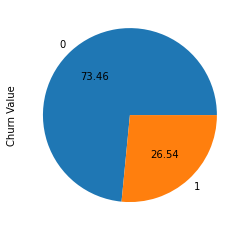

In [37]:
y.value_counts().plot.pie(autopct='%.2f')

We can see that theres a massive imbalance of class distribution . Majority of the values of the Churn Value **0** are **73.46%** compared to Churn Value of **1** which is **26.54** . we are going to fit our data into a function called RandomOverSampler which will upscale  the **1** values to match the value count of **0** 

NB : **0** represent **No** which are customers who did not quite the service or churn while **1** represents **Yes** which are people who quit the service

After Performing Random Over Sampling , number of values of **1** and **0** should be equal

In [38]:
rus = RandomOverSampler(sampling_strategy=1)
x_res , y_res = rus.fit_resample(X,y)

<AxesSubplot:ylabel='Churn Value'>

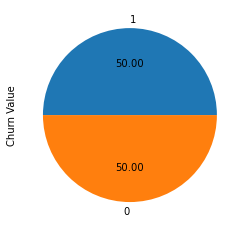

In [39]:
y_res.value_counts().plot.pie(autopct='%.2f')

After fitting our data into the RandomOverSampler function , we can now see that our Churn unique values are equal in count i.e there are now 5174(**50%**) **1** and 5174(**50%**) **0** unique values

In [40]:
# Perform the train-test split on the resampled data . we are train 80% and test 20% of our resampled data  
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

# Model Building and Accuracy 

### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic = LogisticRegression()

# Fit the model to the training data
logistic.fit(X_train, y_train)

# Predict churn on the test data
y_pred_log = logistic.predict(X_test)

### Random Forest Classifier:


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
random = RandomForestClassifier()

# Fit the model to the training data
random.fit(X_train, y_train)

# Predict churn on the test data
y_pred_ran = random.predict(X_test)

### Gradient Boosting Classifier (e.g., XGBoost, LightGBM)

In [43]:
import xgboost as xgb

# Create an XGBoost classifier model
xg = xgb.XGBClassifier()

# Fit the model to the training data
xg.fit(X_train, y_train)

# Predict churn on the test data
y_pred_xg = xg.predict(X_test)

### Support Vector Machines (SVM)


In [44]:
from sklearn.svm import SVC

# Create an SVM classifier model
svm = SVC()

# Fit the model to the training data
svm.fit(X_train, y_train)

# Predict churn on the test data
y_pred_sv = svm.predict(X_test)

In [46]:
# Assuming you have the true labels in 'y_true' and the predicted labels in 'y_pred'
accuracy_log = accuracy_score(y_test, y_pred_log)
accuracy_ran = accuracy_score(y_test, y_pred_ran)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
accuracy_sv = accuracy_score(y_test, y_pred_sv)

print("Compare Each Accuracy Score , The higher The better")
print("Logistic Regression Accuracy:", accuracy_log)
print("Random Forest Accuracy:", accuracy_ran)
print("XGboost  Accuracy:", accuracy_xg)
print("Support Vector Machine Accuracy:", accuracy_sv)

Compare Each Accuracy Score , The higher The better
Logistic Regression Accuracy: 0.8995169082125604
Random Forest Accuracy: 0.961352657004831
XGboost  Accuracy: 0.9594202898550724
Support Vector Machine Accuracy: 0.5410628019323671
